In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from cycler import cycler
from collections import Counter
import gc

In [3]:
import itertools
import pickle

In [4]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.externals import joblib
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [5]:
import classify as myclassify

In [6]:
class_name =  ['Powerline', 'Low Vegetation', 'Impervious Surface', 'Car', 'Fence', 'Roof', 'Facade', 'Shrub', 'Tree']

train_data = np.loadtxt('./Vaihingen/fpfh_ground/Vaihingen3D_Traininig_fpfh_4_ground.txt', skiprows=11)
train_data_feature = myclassify.feature_extraction(train_data)
train_data_class = train_data[:, 34]

test_data = np.loadtxt('./Vaihingen/fpfh_ground/Vaihingen3D_EVAL_WITH_REF_fpfh_4_ground.txt', skiprows=11)
test_data_feature = myclassify.feature_extraction(test_data)
test_data_class = test_data[:, 34]

In [7]:
plt.style.use('default')

### Utils

In [72]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.cool):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    if normalize:
        cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
        print("Normalize confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha='right', fontname = 'Arial', size = 12)
    plt.yticks(tick_marks, classes, fontname = 'Arial', size = 12,)
    plt.colorbar(fraction=0.046, pad=0.04)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", fontname = 'Arial', 
                 size= 12, color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label', fontname = 'Arial', size = 12)
    plt.xlabel("Predict label", fontname = 'Arial', size = 12)

## Measurement of every class as feature radius changes (tree number=50)

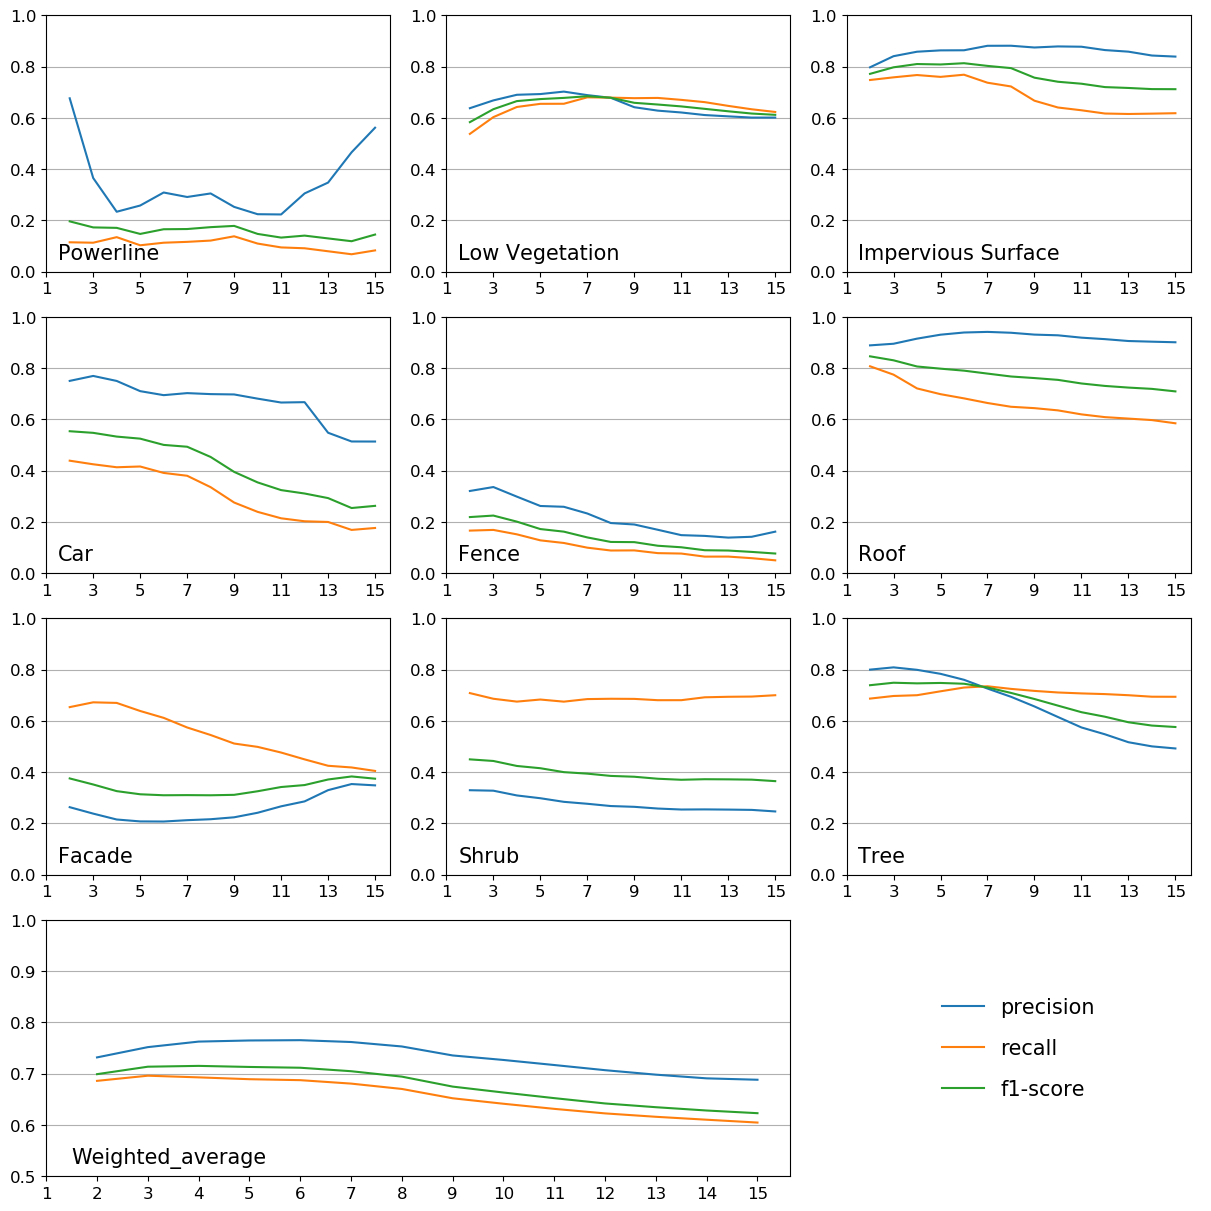

In [5]:
measurement = np.load('final_measure_n50.npy')
x = range(2, 16, 1)
fig = plt.figure(figsize=(12, 12), constrained_layout=True)
gs = fig.add_gridspec(4, 3)
for i in range(9):
    row = i//3
    col = i%3
    ax = fig.add_subplot(gs[row, col])
    ax.plot(x, measurement[0, i, :], label='precision')
    ax.plot(x, measurement[1, i, :], label='recall')
    ax.plot(x, measurement[2, i, :], label='f1-score')
    ax.yaxis.set_ticks(np.arange(0, 1.1, 0.2))
    ax.xaxis.set_ticks(np.arange(1, 16, 2))
    ax.text(1.5, 0.05, class_name[i], fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(which='major', axis='y')

ax = fig.add_subplot(gs[-1,0:-1])
ax.plot(x, measurement[0, 9, :], label='precision')
ax.plot(x, measurement[1, 9, :], label='recall')
ax.plot(x, measurement[2, 9, :], label='f1-score')
ax.yaxis.set_ticks(np.arange(0.5, 1.01, 0.1))
ax.xaxis.set_ticks(np.arange(1, 16, 1))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.text(1.5, 0.525, 'Weighted_average', fontsize=15)
ax.grid(which='major', axis='y')
handle, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[-1,-1])
ax.legend(handle, labels, fontsize = 15, ncol = 1, loc='center', frameon=False, labelspacing = 1)
ax.axis('off')
fig.savefig("result.pdf")

## Compare Random Forest with multi-radius fpfh

Confusion matrix, without normalization
[[   43     1     4     0     0   162   171     3   216]
 [    0 62854 17695    32   235  8981   244  6548  2101]
 [    0 26461 74803     6     4   439    40   146    87]
 [    0   623    46  1185   172   261     8  1310   103]
 [    0  1263    24    20   570   806   182  3100  1457]
 [    6  2395    73     2    69 96460  1403   678  7962]
 [    7   770   110     2    19  1068  4791  1019  3438]
 [    1  4849   163    69   193  1501   258 10698  7086]
 [    4   954    12    23    33  1471   595  4200 46934]]
Confusion matrix, without normalization
[[   27     2     0     0     0   262   164     7   138]
 [    0 72575 11924    37   163  5038   242  6838  1873]
 [    0 24055 77251    10     7   300    63   202    98]
 [    0   658   137  1204   273   141    15  1211    69]
 [    0  1287    59    14   586   601   277  3294  1304]
 [    3  2138    68     5    65 92160  4386  1901  8322]
 [    2   762   129    13     9  1258  5070  1241  2740]
 [    0

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[    0     2     0     0     0   190    18     3   387]
 [    0 71113 11161    14   192  1636   119 11810  2645]
 [    0 37590 63411     3    17   153     5   595   212]
 [    0   804   199   403   135   286     5  1753   123]
 [    0  1136   179    17    52   289   170  3527  2052]
 [    0   550    24     2    61 67260   810  4681 35660]
 [    0   836    48     9    14   993  2617  1238  5469]
 [    0  4642   112    29    92  1002   222  9988  8731]
 [    0   806    18     3    12  4491   513  4141 44242]]


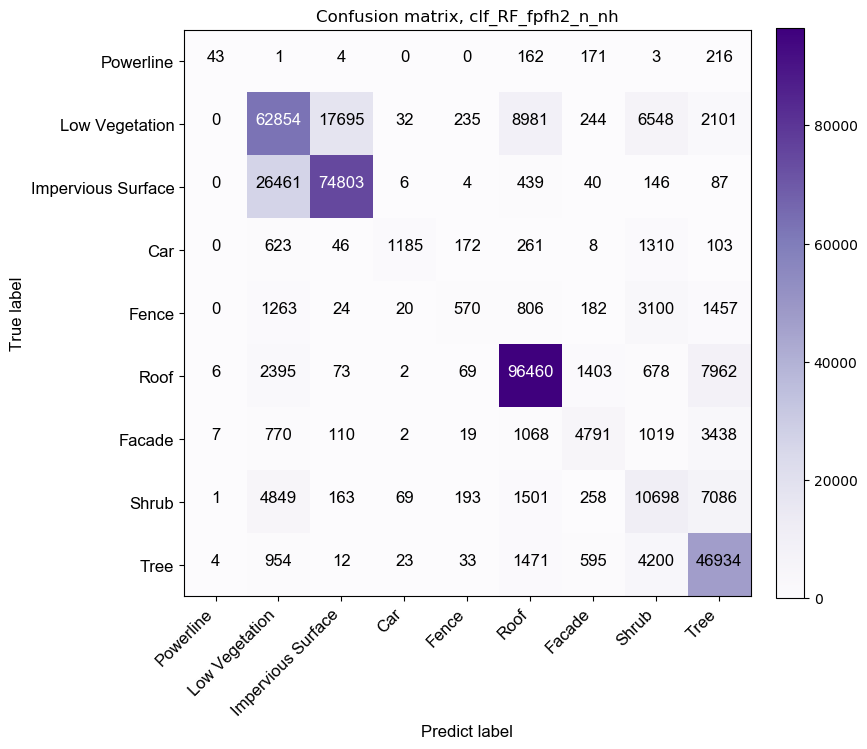

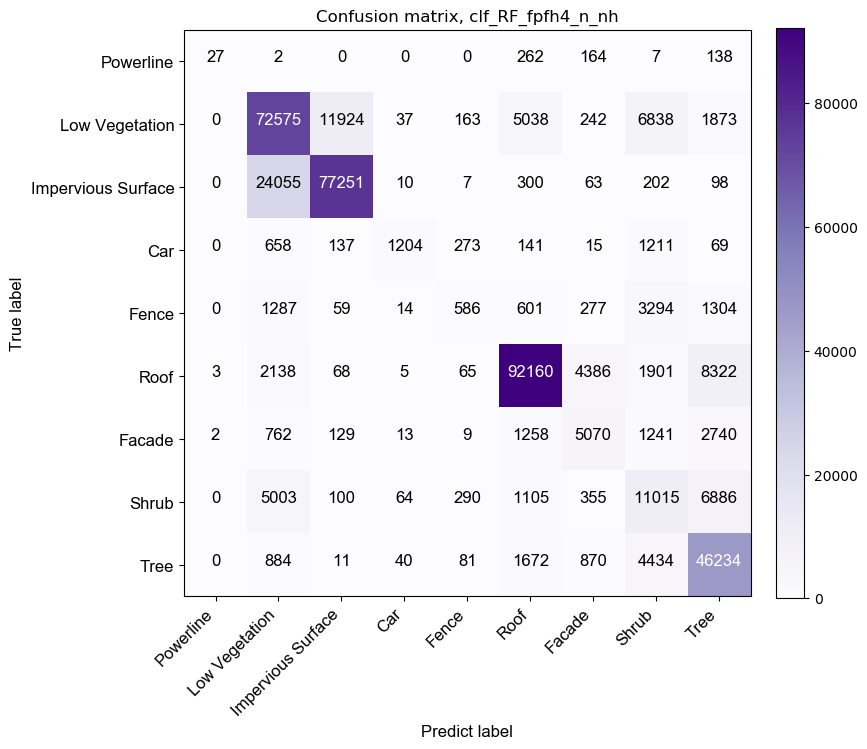

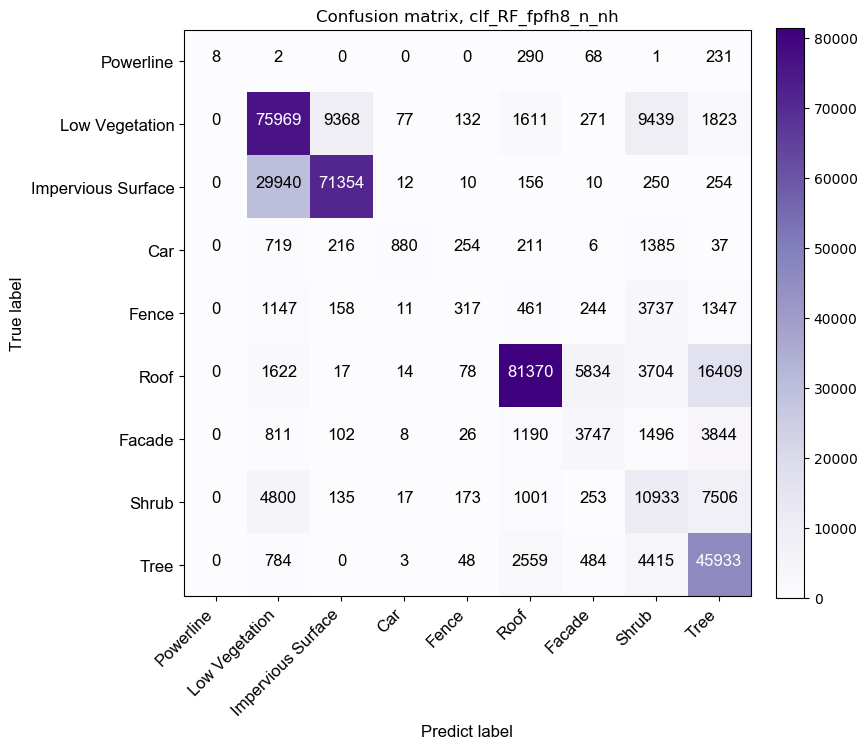

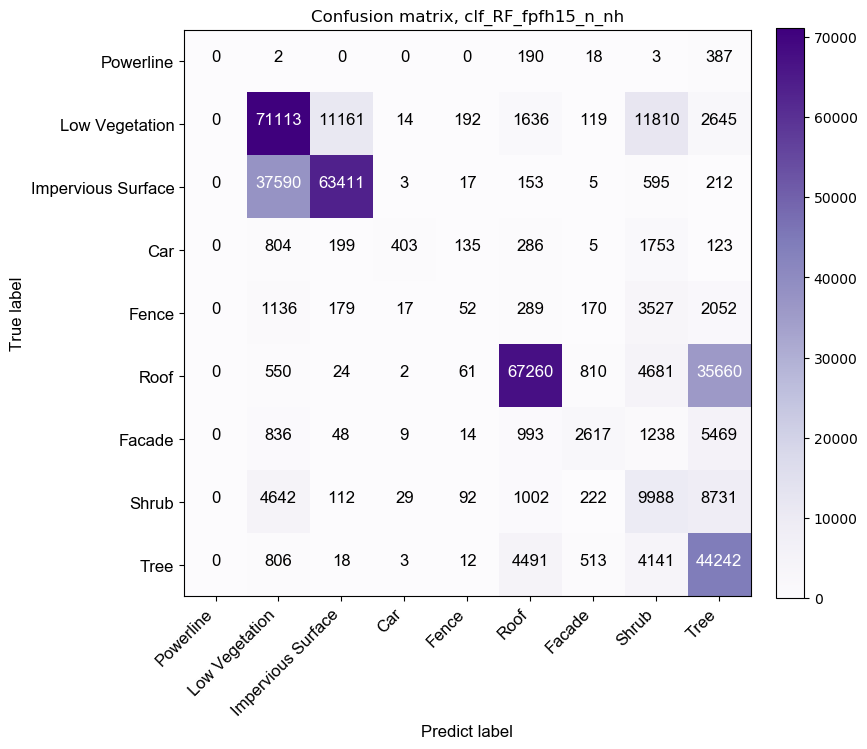

In [96]:
for scale in [2, 4, 8, 15]:
    train_data = np.loadtxt('./Vaihingen/fpfh_ground/Vaihingen3D_Traininig_fpfh_{}_ground.txt'.format(scale), skiprows=11)
    train_data_feature = myclassify.feature_extraction(train_data)
    train_data_class = train_data[:, 34]

    test_data = np.loadtxt('./Vaihingen/fpfh_ground/Vaihingen3D_EVAL_WITH_REF_fpfh_{}_ground.txt'.format(scale), skiprows=11)
    test_data_feature = myclassify.feature_extraction(test_data)
    test_data_class = test_data[:, 34]
    
    clf_RF_fpfh_n_nh = RandomForestClassifier(n_estimators=50, max_features='auto', random_state=0)
    clf_RF_fpfh_n_nh.fit(train_data_feature, train_data_class)
    joblib.dump(clf_RF_fpfh_n_nh, './multi_scale_result/RF_fhpf_scale{}_n_nh.joblib'.format(scale))
    pre_test = clf_RF_fpfh_n_nh.predict(test_data_feature)
        
    with open('./multi_scale_result/PRFS_fpfh{}.pickle'.format(scale), 'wb') as f:
        pickle.dump(precision_recall_fscore_support(test_data_class, pre_test), f)
        
    with open('./multi_scale_result/PRFS_ave_fpfh{}.pickle'.format(scale), 'wb') as f:
        pickle.dump(precision_recall_fscore_support(test_data_class, pre_test, average='weighted'), f)
        
    cnf_matrix = confusion_matrix(test_data_class, pre_test)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8, 8))
    plot_confusion_matrix(cnf_matrix, classes=class_name, title='Confusion matrix, clf_RF_fpfh{}_n_nh'.format(scale), cmap=plt.cm.Purples)
    plt.savefig("./multi_scale_result/Confusion_matrix_RF_fpfh{}_n_nh.jpg".format(scale))

Confusion matrix, without normalization
[[   15     2     0     0     0   324    62     3   194]
 [    0 78275  9414     6    36  2683   184  6465  1627]
 [    0 30600 70786     3     4   339    13   118   123]
 [    0   726   250   996    60   280     9  1352    35]
 [    0  1193   130     3   295   778   274  3181  1568]
 [    1  1119     5     2     4 95858  2664  1131  8264]
 [    1   919   107     8     1  1199  4574  1173  3242]
 [    0  5128    97    10    23  1334   213 10387  7626]
 [    3   892     2    11     1  2059   247  3961 47050]]


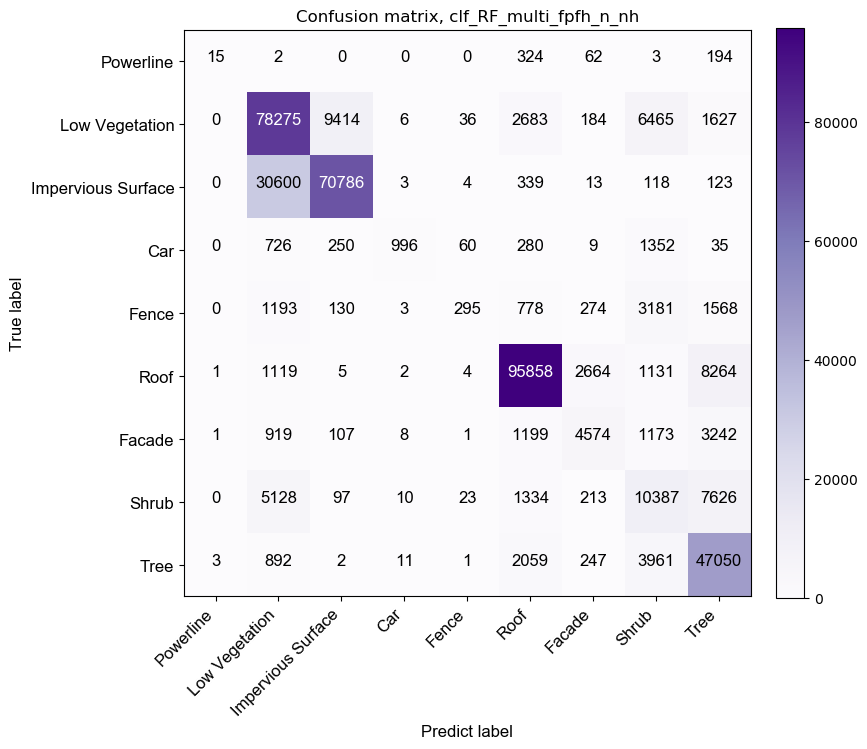

In [98]:
# train random forest using multi-scale fpfh

for scale in [2, 4, 8, 15]:
    train_data = np.loadtxt('./Vaihingen/fpfh_ground/Vaihingen3D_Traininig_fpfh_{}_ground.txt'.format(scale), skiprows=11)
    test_data = np.loadtxt('./Vaihingen/fpfh_ground/Vaihingen3D_EVAL_WITH_REF_fpfh_{}_ground.txt'.format(scale), skiprows=11)
    
    if scale == 2:
        train_multi_fpfh = myclassify.feature_extraction(train_data)
        test_multi_fpfh = myclassify.feature_extraction(test_data)
        train_data_class = train_data[:, 34]
        test_data_class = test_data[:, 34]        
    else:
        train_tmp = train_data[:, 1:34]
        test_tmp = test_data[:, 1:34]
        train_multi_fpfh = np.hstack((train_tmp, train_multi_fpfh))
        test_multi_fpfh = np.hstack((test_tmp, test_multi_fpfh))
clf_RF_multi_fpfh_n_nh = RandomForestClassifier(n_estimators=500, max_features='auto', random_state=0)
clf_RF_multi_fpfh_n_nh.fit(train_multi_fpfh, train_data_class)
joblib.dump(clf_RF_multi_fpfh_n_nh, './multi_scale_result/RF_fhpf_mulit_scale_n_nh.joblib')
pre_test = clf_RF_multi_fpfh_n_nh.predict(test_multi_fpfh)
        
with open('./multi_scale_result/PRFS_multi_fpfh.pickle', 'wb') as f:
    pickle.dump(precision_recall_fscore_support(test_data_class, pre_test), f)

with open('./multi_scale_result/PRFS_ave_multi_fpfh.pickle', 'wb') as f:
    pickle.dump(precision_recall_fscore_support(test_data_class, pre_test, average='weighted'), f)
        
cnf_matrix = confusion_matrix(test_data_class, pre_test)
np.set_printoptions(precision=2)
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_name, title='Confusion matrix, clf_RF_multi_fpfh_n_nh', cmap=plt.cm.Purples)
plt.savefig("./multi_scale_result/Confusion_matrix_RF_multi_fpfh_n_nh.jpg")

## fpfh visualize (radius = 4)

In [7]:
train_data_fpfh = train_data[:, 1:34]
train_data_class = train_data[:, 34]

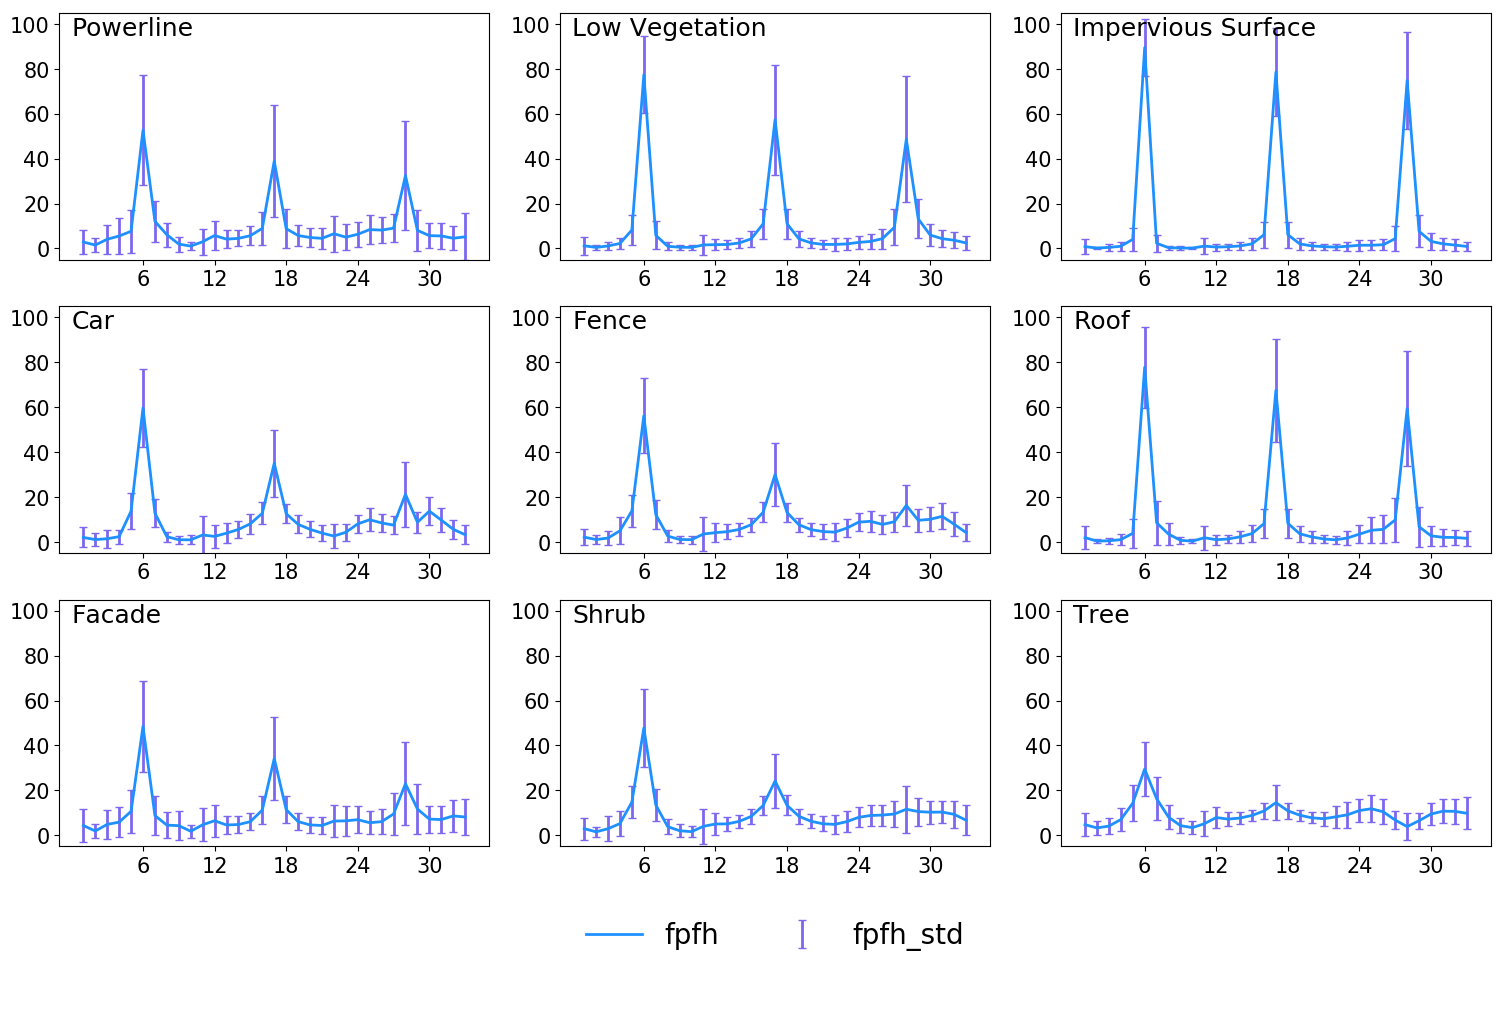

In [8]:
fig = plt.figure(figsize=(15, 10), constrained_layout=True)
widths = [5, 5, 5]
heights = [3, 3, 3, 1]
gs = fig.add_gridspec(ncols=3, nrows=4, width_ratios=widths, height_ratios=heights)

for i in range(len(class_name)):
    specify_class = train_data_class == i
    feature = train_data_fpfh[specify_class]
    feature_std = np.std(feature, axis=0)
    feature_mean = np.mean(feature, axis=0)
    
    row = i//3
    col = i%3
    ax = fig.add_subplot(gs[row, col])
    plot_x = np.arange(len(feature_mean))+1
    ax.errorbar(plot_x, feature_mean, yerr = feature_std, linewidth=0, ecolor='#7b68ee', elinewidth = 2, capsize = 3, label = 'fpfh_std')
    ax.plot(plot_x, feature_mean, color='#1e90ff', lw=2, label = 'fpfh')    
    ax.yaxis.set_ticks(np.arange(0, 101, 20))
    ax.set_ylim(-5,105)
    ax.xaxis.set_ticks(np.arange(6, 34, 6))
    ax.set_xlim(-1,35)
    ax.text(0, 95, class_name[i], fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=15)
handle, labels = ax.get_legend_handles_labels()
ax = fig.add_subplot(gs[-1,:])
ax.legend(handle, labels, fontsize = 20, ncol = 2, loc='center', frameon=False, labelspacing = 3)
ax.axis('off')
fig.savefig("fpfh_radius_4.png")

## Measurement of every class as tree number change

In [10]:
def predict_measure(ground_truth, predict_class):
    precision_recall_fscore = myclassify.precision_recall_fscore_support(ground_truth, predict_class)
    precision_recall_fscore_average = myclassify.precision_recall_fscore_support(ground_truth, predict_class, average='weighted')
    for i in range(3):
        if i == 0:
            measure = np.append(precision_recall_fscore[i], precision_recall_fscore_average[i])
        else:
            tmp = np.append(precision_recall_fscore[i], precision_recall_fscore_average[i])
            measure = np.vstack((measure, tmp))
    return measure

In [21]:
for count_learnbase in range(5, 105, 5):
    print(count_learnbase)
    X_resampled, y_resampled = myclassify.resample_data(train_data_feature, train_data_class, count_learnbase)
    clf_estimator = myclassify.train_brf(X_resampled, y_resampled, count_learnbase)
    test_predict = myclassify.predict_brf(clf_estimator, test_data_feature)
    test_precision_recall_fscore = predict_measure(test_data_class, test_predict)
    
    train_predict = myclassify.predict_brf(clf_estimator, train_data_feature) 
    train_precision_recall_fscore = predict_measure(train_data_class, train_predict)
    
    if count_learnbase != 100:
        del X_resampled, y_resampled, clf_estimator
        gc.collect()
    
    if count_learnbase == 5:
        final_test_prf = test_precision_recall_fscore
        final_train_prf = train_precision_recall_fscore
    else:
        final_test_prf = np.dstack((final_test_prf, test_precision_recall_fscore))
        final_train_prf = np.dstack((final_train_prf, train_precision_recall_fscore))
    
    if count_learnbase !=100:
        del test_predict, train_predict, test_precision_recall_fscore, train_precision_recall_fscore
        gc.collect()
    
np.save('./classify_output/test_prf_with_tree_number', final_test_prf)
np.save('./classify_output/train_prf_with_tree_number', final_train_prf)

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100


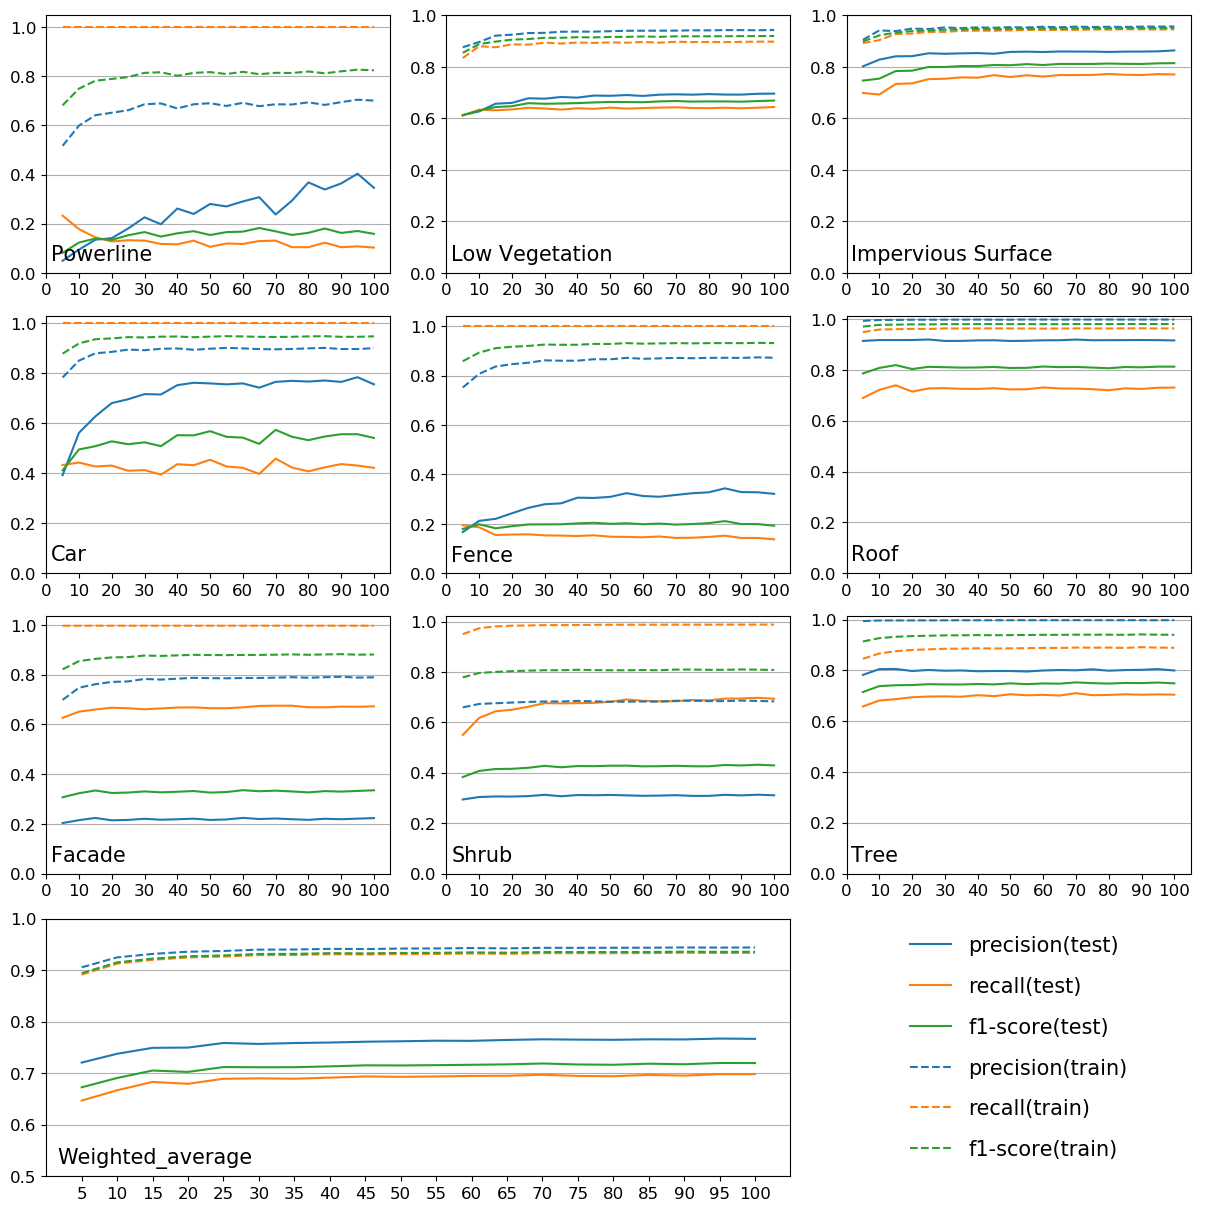

In [38]:
x = range(5, 105, 5)
fig = plt.figure(figsize=(12, 12), constrained_layout=True)
gs = fig.add_gridspec(4, 3)
for i in range(9):
    row = i//3
    col = i%3
    ax = fig.add_subplot(gs[row, col])
    ax.plot(x, final_test_prf[0, i, :], color='C0', label='precision(test)')
    ax.plot(x, final_test_prf[1, i, :], color='C1', label='recall(test)')
    ax.plot(x, final_test_prf[2, i, :], color='C2', label='f1-score(test)')
    
    ax.plot(x, final_train_prf[0, i, :], color='C0', linestyle='--', label='precision(train)')
    ax.plot(x, final_train_prf[1, i, :], color='C1', linestyle='--', label='recall(train)')
    ax.plot(x, final_train_prf[2, i, :], color='C2', linestyle='--', label='f1-score(train)')
    
    ax.yaxis.set_ticks(np.arange(0, 1.1, 0.2))
    ax.xaxis.set_ticks(np.arange(0, 105, 10))
    ax.set_xlim(0, 105)
    ax.text(1.5, 0.05, class_name[i], fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(which='major', axis='y')

ax = fig.add_subplot(gs[-1,0:-1])

ax.plot(x, final_test_prf[0, 9, :], color='C0', label='precision(test)')
ax.plot(x, final_test_prf[1, 9, :], color='C1', label='recall(test)')
ax.plot(x, final_test_prf[2, 9, :], color='C2', label='f1-score(test)')

ax.plot(x, final_train_prf[0, 9, :], color='C0', linestyle='--', label='precision(train)')
ax.plot(x, final_train_prf[1, 9, :], color='C1', linestyle='--', label='recall(train)')
ax.plot(x, final_train_prf[2, 9, :], color='C2', linestyle='--', label='f1-score(train)')

ax.yaxis.set_ticks(np.arange(0.5, 1.01, 0.1))
ax.xaxis.set_ticks(np.arange(5, 105, 5))
ax.set_xlim(0, 105)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.text(1.5, 0.525, 'Weighted_average', fontsize=15)
ax.grid(which='major', axis='y')
handle, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[-1,-1])
ax.legend(handle, labels, fontsize = 15, ncol = 1, loc='center', frameon=False, labelspacing = 1)
ax.axis('off')
fig.savefig("./classify_output/training_validation.png")

## The class ration before and after resample 

In [7]:
import classify as myclassify
from collections import Counter

In [9]:
X_resampled, y_resampled = myclassify.resample_data(train_data_feature, train_data_class, 5)
before_resample = np.copy(train_data_class).astype('int')
after_resample = np.copy(y_resampled[0].astype('int'))
ration_before_resample = Counter(before_resample)
ration_after_resample = Counter(after_resample)

In [11]:
class_count_bfR = []
class_count_afR = []
for i in range(9):
    class_count_bfR.append(ration_before_resample[i])
    class_count_afR.append(ration_after_resample[i])

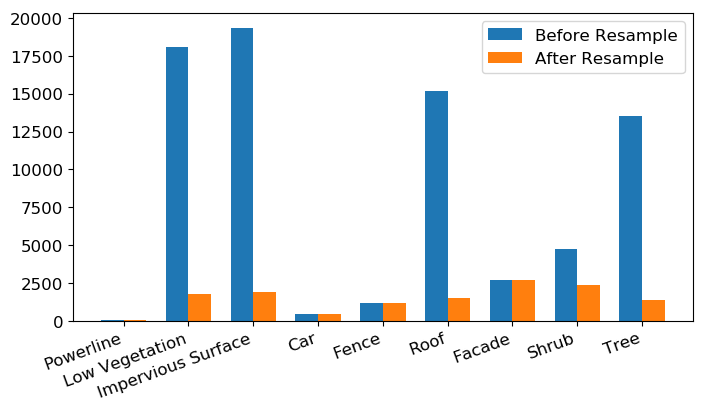

In [31]:
ind = np.arange(len(class_count_afR))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 4))
rects1 = ax.bar(ind - width/2, class_count_bfR,width, label='Before Resample')
rects2 = ax.bar(ind + width/2, class_count_afR, width,label='After Resample')
ax.set_xticks(ind)
ax.set_xticklabels(class_name, fontsize=12, rotation=20, ha='right')
ax.set_yticklabels(np.arange(0, 2000001, 2500), fontsize=12)
ax.legend(fontsize=12)

## Classical Random Forest $\textit{vs}$ Balanced Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.metrics import precision_recall_fscore_support

In [16]:
#clf = RandomForestClassifier(n_estimators=50, max_features='auto', random_state=0)
#clf.fit(train_data_feature, train_data_class)
#joblib.dump(clf, './randomforest.joblib')
clf = joblib.load('./randomforest.joblib')
crf_predict_test_data = clf.predict(test_data_feature)

In [17]:
Counter(crf_predict_test_data.astype('int') == test_data_class)

Counter({False: 105599, True: 306123})

In [68]:
306123/411722

0.743518684937895

In [38]:
precision_recall_fscore_support(test_data_class, crf_predict_test_data)

(array([0.84375   , 0.67598983, 0.86142953, 0.86806056, 0.39755767,
        0.89879652, 0.44319175, 0.36536165, 0.68325845]),
 array([0.045     , 0.73542406, 0.75748632, 0.32470334, 0.07895446,
        0.84512325, 0.45179971, 0.44371021, 0.85257994]),
 array([0.08544304, 0.70445556, 0.80612106, 0.47262022, 0.1317446 ,
        0.87113392, 0.44745434, 0.40074239, 0.75858561]),
 array([   600,  98690, 101986,   3708,   7422, 109048,  11224,  24818,
         54226], dtype=int64))

In [39]:
precision_recall_fscore_support(test_data_class, crf_predict_test_data, average='weighted')

(0.7537783867238395, 0.743518684937895, 0.7422864452660245, None)

In [5]:
brf_test_predict = np.loadtxt('./classify_output/test_predict.pts', skiprows=1)

In [6]:
brf_test_predict

array([[ 0.0000e+00,  0.0000e+00,  2.6604e+02,  2.0000e+00],
       [ 0.0000e+00,  4.0000e-02,  2.6602e+02,  2.0000e+00],
       [ 0.0000e+00,  5.0000e-02,  2.6605e+02,  2.0000e+00],
       ...,
       [ 3.7161e+02, -6.9900e+01,  2.7038e+02,  1.0000e+00],
       [ 3.7161e+02, -6.9470e+01,  2.7041e+02,  1.0000e+00],
       [ 3.7160e+02, -6.9060e+01,  2.7043e+02,  1.0000e+00]])

In [7]:
brf_test_predict = brf_test_predict[:, -1]

In [14]:
Counter(brf_test_predict.astype('int') == test_data_class.astype('int'))

Counter({False: 126045, True: 285677})

In [12]:
285677 / (285677+126045)

0.693858963086743

In [18]:
precision_recall_fscore_support(test_data_class, brf_test_predict, average='weighted')

(0.7628149252759676, 0.693858963086743, 0.7157917476736205, None)

## Balance Random Forest using imbalanced-learn

In [11]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.externals import joblib
from sklearn.metrics import precision_recall_fscore_support

In [7]:
multiplier = {0: 1.0, 1: 0.1, 2: 0.1, 3: 1.0, 4: 1.0, 5: 0.1, 6: 1.0, 7:0.5, 8: 0.1}
target_stats = Counter(train_data_class)
for key, value in target_stats.items():
    target_stats[key] = int(value * multiplier[key])

In [16]:
brf_clf = BalancedRandomForestClassifier(n_estimators=50, max_features='auto', random_state=0, sampling_strategy=target_stats)
brf_clf.fit(train_data_feature, train_data_class)
joblib.dump(brf_clf, './BalancedRandomForest.joblib')
brf_clf_predict_test_data = brf_clf.predict(test_data_feature)
precision_recall_fscore_support(test_data_class, brf_clf_predict_test_data, average='weighted')

(0.7629556421195022, 0.6875027324262488, 0.7112428780512532, None)

## EasyEnsemble using imbalanced-learn

In [17]:
from imblearn.ensemble import EasyEnsembleClassifier

In [19]:
ee_clf = EasyEnsembleClassifier(n_estimators=50, random_state=0, sampling_strategy=target_stats)
ee_clf.fit(train_data_feature, train_data_class)
joblib.dump(ee_clf, './EasyEnsemble.joblib')
ee_clf_predict_test_data = ee_clf.predict(test_data_feature)
precision_recall_fscore_support(test_data_class, ee_clf_predict_test_data, average='weighted')

(0.7035173288178679, 0.4792602775659304, 0.5315036912610108, None)

## The intensity difference: Impervious ground $\textit{vs}$ Low Vegetation

In [5]:
import seaborn as sns
from IPython.core.pylabtools import figsize

### before smoothing intensity

In [ ]:
impervious_ground = train_data_class == 2
impervious_ground = train_data[impervious_ground, -7] 
low_vegtation = train_data_class == 1
low_vegtation = train_data[low_vegtation, -7]
tree = train_data_class == 8
tree = train_data[tree, -7]

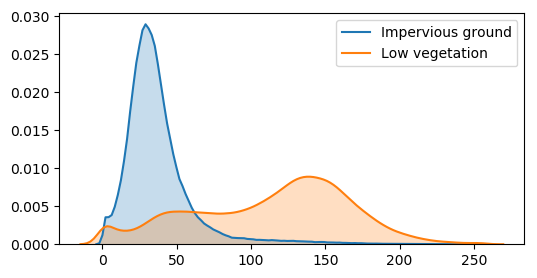

In [7]:
figsize(6, 3)
sns.distplot(impervious_ground, hist=False, kde=True, kde_kws = {'shade': True}, label = 'Impervious ground')
sns.distplot(low_vegtation, hist=False, kde=True, kde_kws = {'shade': True}, label='Low vegetation')
plt.legend()

### after smoothing intensity

## Compare the precisions between with and without intensity in random forest

### with intensity

In [9]:
intensity = train_data[:, -7]
intensity = intensity.reshape((intensity.shape[0], 1))
train_data_feature_i = np.hstack((train_data_feature, intensity))

intensity = test_data[:, -7]
intensity = intensity.reshape((intensity.shape[0], 1))
test_data_feature_i = np.hstack((test_data_feature, intensity))

In [18]:
clf_RF_fpfh_n_nh_i=clf

In [19]:
clf_RF_fpfh_n_nh_i

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [10]:
clf_RF_fpfh_n_nh_i = RandomForestClassifier(n_estimators=50, max_features='auto', random_state=0)
clf_RF_fpfh_n_nh_i.fit(train_data_feature_i, train_data_class)
joblib.dump(clf_RF_fpfh_n_nh_i, './classifier/RF_fpfh_n_nh_i.joblib')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [11]:
intensity = test_data[:, -7]
intensity = intensity.reshape((intensity.shape[0], 1))
test_data_feature_i = np.hstack((test_data_feature, intensity))

In [12]:
pre_test_i = clf_RF_fpfh_n_nh_i.predict(test_data_feature_i)

In [15]:
precision_recall_fscore_support(test_data_class, pre_test_i, average='weighted')

(0.7932482606518084, 0.7855470438791223, 0.7837452213708825, None)

In [16]:
precision_recall_fscore_support(test_data_class, pre_test_i)

(array([0.92857143, 0.77872103, 0.90049482, 0.87806452, 0.46536039,
        0.9123515 , 0.44520064, 0.37091432, 0.68138193]),
 array([0.04333333, 0.77797143, 0.87971878, 0.36704423, 0.08959849,
        0.84792935, 0.44877049, 0.44673221, 0.8536311 ]),
 array([0.08280255, 0.77834605, 0.88998557, 0.51768733, 0.15026551,
        0.87896158, 0.44697844, 0.40530808, 0.75784217]),
 array([   600,  98690, 101986,   3708,   7422, 109048,  11224,  24818,
         54226], dtype=int64))

Confusion matrix, without normalization
[[   26     2     0     0     0   291   133     9   139]
 [    0 76778  9278    36   159  3554   223  6730  1932]
 [    0 11551 89719    13     4   348    42   191   118]
 [    0   609   133  1361   206   157    14  1172    56]
 [    0  1229   100    16   665   513   288  3292  1319]
 [    1  1901   115     9    30 92465  4372  1776  8379]
 [    1   788    99    16    10  1227  5037  1253  2793]
 [    0  4842   165    77   279  1144   315 11087  6909]
 [    0   895    24    22    76  1649   890  4381 46289]]


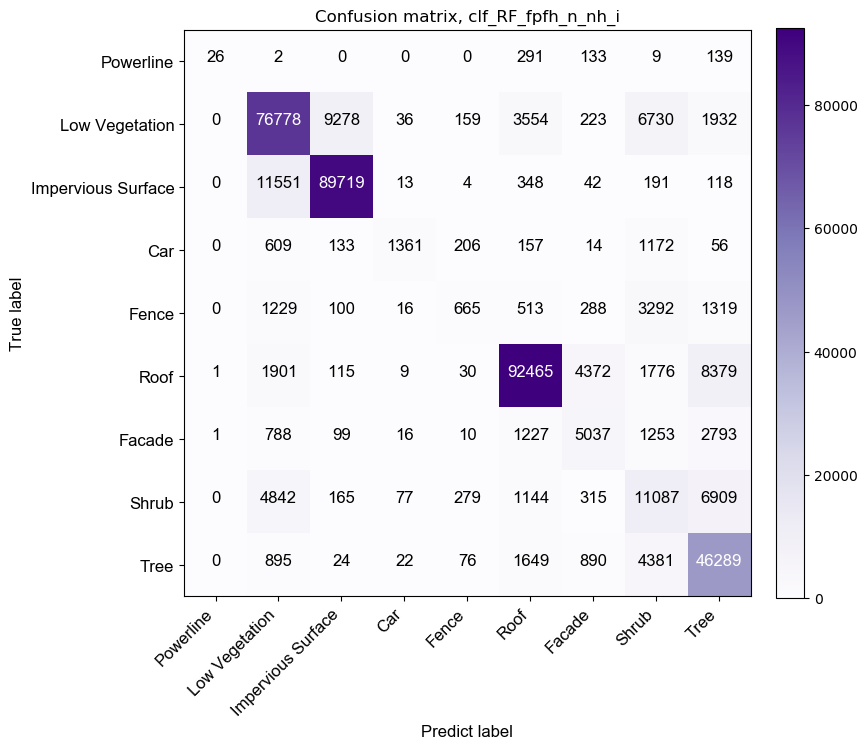

In [73]:
cnf_matrix = confusion_matrix(test_data_class, pre_test_i)
np.set_printoptions(precision=2)
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_name, title='Confusion matrix, clf_RF_fpfh_n_nh_i', cmap=plt.cm.Purples)

### without intensity

In [20]:
clf_RF_fpfh_n_nh = RandomForestClassifier(n_estimators=50, max_features='auto', random_state=0)
clf_RF_fpfh_n_nh.fit(train_data_feature, train_data_class)
joblib.dump(clf_RF_fpfh_n_nh, './classifier/RF_fpfh_n_nh.joblib')

['./classifier/RF_fpfh_n_nh.joblib']

In [21]:
pre_test = clf_RF_fpfh_n_nh.predict(test_data_feature)

In [95]:
precision_recall_fscore_support(test_data_class, pre_test, average='weighted')

(0.7537764182302723, 0.7435162561145627, 0.7422840613658547, None)

In [91]:
with open('./multi_scale_result/PRFS_ave_fpfh{}.pickle'.format(4), 'wb') as f:
    pickle.dump(a, f)

In [85]:
precision_recall_fscore_support(test_data_class, pre_test)

(array([0.84, 0.68, 0.86, 0.87, 0.4 , 0.9 , 0.44, 0.37, 0.68]),
 array([0.04, 0.74, 0.76, 0.32, 0.08, 0.85, 0.45, 0.44, 0.85]),
 array([0.09, 0.7 , 0.81, 0.47, 0.13, 0.87, 0.45, 0.4 , 0.76]),
 array([   600,  98690, 101986,   3708,   7422, 109048,  11224,  24818,
         54226], dtype=int64))

Confusion matrix, without normalization
[[   27     2     0     0     0   262   164     7   138]
 [    0 72575 11924    37   163  5038   242  6838  1873]
 [    0 24055 77251    10     7   300    63   202    98]
 [    0   658   137  1204   273   141    15  1211    69]
 [    0  1287    59    14   586   601   277  3294  1304]
 [    3  2138    68     5    65 92160  4386  1901  8322]
 [    2   762   129    13     9  1258  5070  1241  2740]
 [    0  5003   100    64   290  1105   355 11015  6886]
 [    0   884    11    40    81  1672   870  4434 46234]]


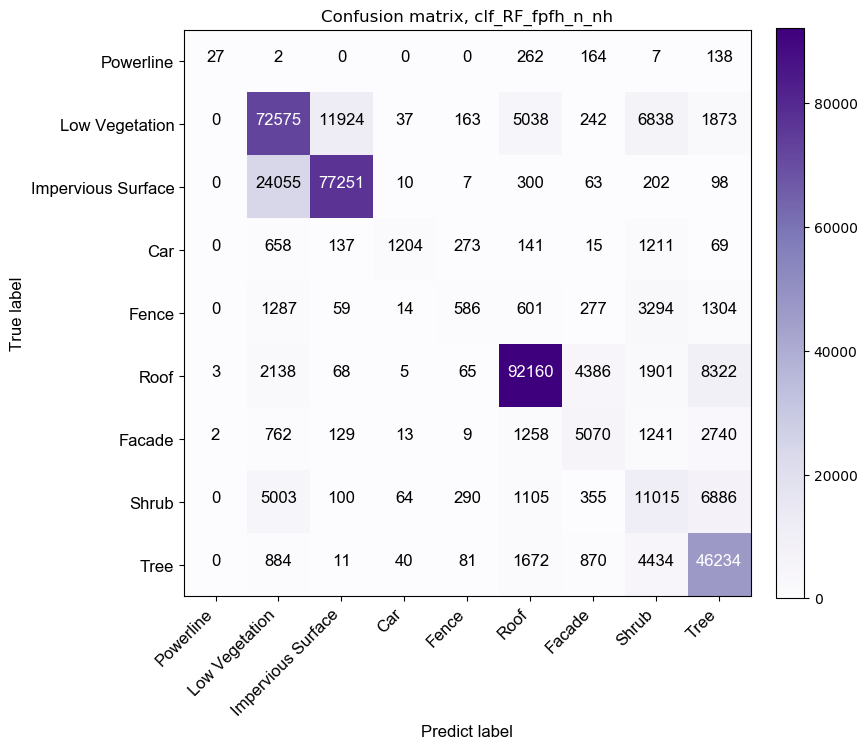

In [75]:
cnf_matrix = confusion_matrix(test_data_class, pre_test)
np.set_printoptions(precision=2)
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_name, title='Confusion matrix, clf_RF_fpfh_n_nh', cmap=plt.cm.Purples)

## Using intensity in impervious and low vegetation classification

## Compare Balance Random Forest, Weight Random Forest and EasyEnsemble for real word